In [43]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_animal_histogram(db_path, city_name):
    # Подключение к базе данных
    conn = sqlite3.connect(db_path)
    
    # SQL запрос для получения данных о животных по выбранному городу
    query = """
    SELECT 
        re.specie, 
        SUM(re.count) AS total_count
    FROM 
        report_entries re
    JOIN 
        household h ON re.household = h.pk
    JOIN 
        city c ON h.belongs_to_city = c.pk
    WHERE 
        c.name = ?
    GROUP BY 
        re.specie
    """
    
    # Выполнение запроса и загрузка данных в DataFrame
    df = pd.read_sql_query(query, conn, params=(city_name,))
    
    # Закрытие соединения с базой данных
    conn.close()
    
    # Проверка, есть ли данные для построения графика
    if df.empty:
        print(f"No data found for city: {city_name}")
        return
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='specie', weights='total_count', bins=len(df), kde=False)
    
    plt.title(f'Количество животных по видам в городе {city_name}')
    plt.xlabel('Вид животных')
    plt.ylabel('Общее количество')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Отображение графика
    plt.show()

# Пример использования функции
# plot_animal_histogram('path_to_your_database.db', 'Название_города')


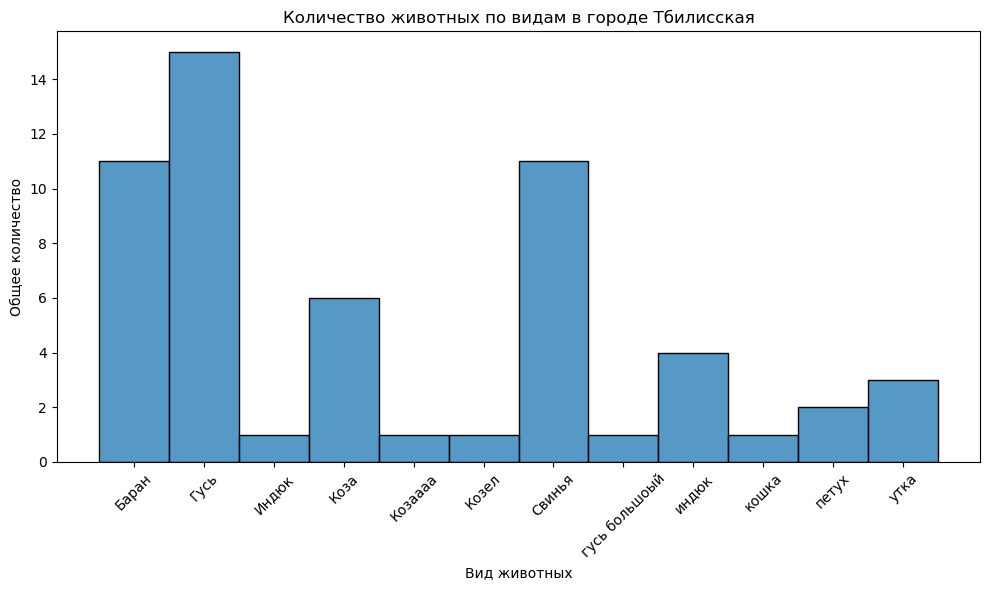

In [44]:
plot_animal_histogram('MainDatabaseVet.sqlite3', "Тбилисская")

In [52]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_animal_histogram(db_path, city_name):
    # Подключение к базе данных
    conn = sqlite3.connect(db_path)
    
    # SQL запрос для получения данных о животных по выбранному городу
    query = """
    SELECT 
        re.specie, 
        SUM(re.count) AS total_count
    FROM 
        report_entries re
    JOIN 
        household h ON re.household = h.pk
    JOIN 
        city c ON h.belongs_to_city = c.pk
    JOIN
        settlement s ON c.belongs_to_settlement = s.pk
    WHERE 
        s.name = ?
    GROUP BY 
        re.specie
    """
    
    # Выполнение запроса и загрузка данных в DataFrame
    df = pd.read_sql_query(query, conn, params=(city_name,))
    
    # Закрытие соединения с базой данных
    conn.close()
    
    # Проверка, есть ли данные для построения графика
    if df.empty:
        print(f"No data found for city: {city_name}")
        return
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='specie', weights='total_count', bins=len(df), kde=False)
    
    plt.title(f'Количество животных по видам в поселении {city_name}')
    plt.xlabel('Вид животных')
    plt.ylabel('Общее количество')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Отображение графика
    plt.show()

# Пример использования функции
# plot_animal_histogram('path_to_your_database.db', 'Название_города')


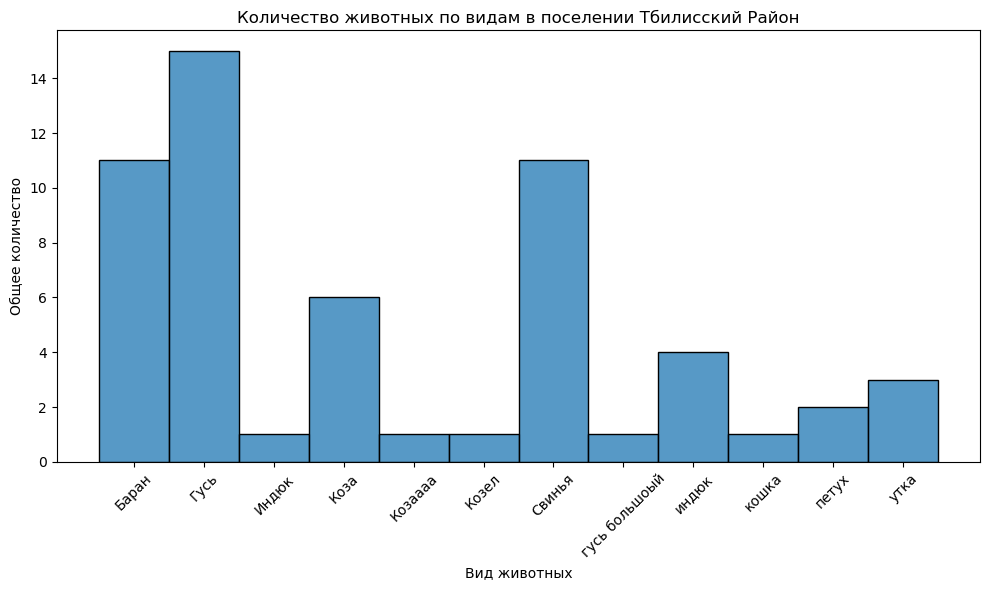

In [53]:
plot_animal_histogram('MainDatabaseVet.sqlite3', "Тбилисский Район")